In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
linear_data = pd.read_csv('data_linear.csv')

In [2]:
# .iloc <=> Extract Data from DataFrame to Series
# values <=> Convert data from Series to 1D Numpy array
# reshape(-1,1) <=> Convert 1D Numpy Array to 2D numpy array, 1: number of column, -1: number of row (automatic calculate from number of elements)
X_linear = linear_data.iloc[:,0].values.reshape(-1,1)
y_linear = linear_data.iloc[:,1].values.reshape(-1,1)

Text(0, 0.5, 'giá/100')

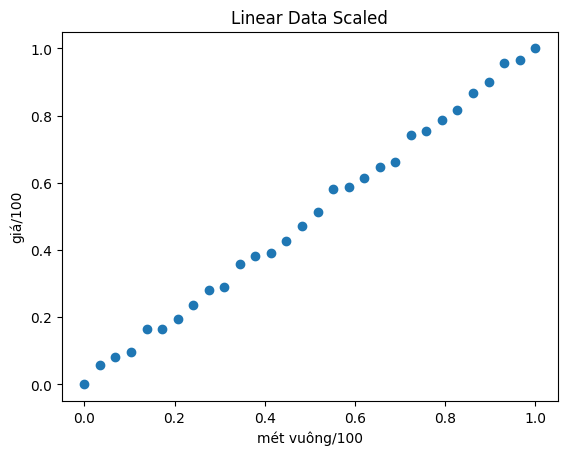

In [3]:
# Normalize Data
X_linear=MinMaxScaler().fit_transform(X_linear)
y_linear=MinMaxScaler().fit_transform(y_linear)

#Visualize Scaled Data
plt.scatter(X_linear, y_linear)
plt.title('Linear Data Scaled')
plt.xlabel('mét vuông/100')
plt.ylabel('giá/100')

In [4]:
# Loss function
def lossFunction(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradientDescent(X, y, lr=0.01, n_iter=10000):
    m = len(y)
    # Parameters initialize
    W = np.zeros((1, 1))
    b = 0

    for _ in range(n_iter):
        y_pred = np.dot(X, W) + b
        loss = lossFunction(y, y_pred)

        # Gradient
        dW = -(2/m) * np.dot(X.T, (y - y_pred))
        db = -(2/m) * np.sum(y - y_pred)

        # Update parameters
        W -= lr * dW
        b -= lr * db

    return W, b

# Training
W, b = gradientDescent(X_linear, y_linear)

In [5]:
# Prediction
def predict(X, W, b):
    return np.dot(X, W) + b
y_pred = predict(X_linear, W, b)

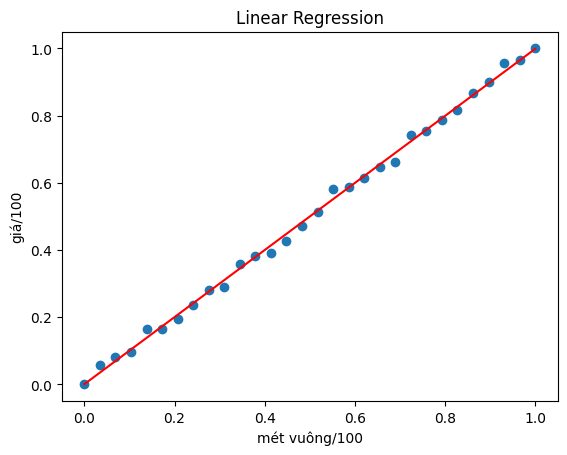

In [6]:
# Visualize Linear Regression
plt.scatter(X_linear, y_linear)
plt.plot(X_linear, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('mét vuông/100')
plt.ylabel('giá/100')
plt.show()